### imports and config

In [116]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')

import pandas as pd
import numpy as np

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import median_absolute_error
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import r2_score


pd.set_option('display.max_colwidth', -1)
pd.set_option('display.height', 1000)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

### meta kaggle

In [110]:
cmptns = pd.read_csv('meta-kaggle/Competitions.csv')


evlgs = pd.read_csv('meta-kaggle/EvaluationAlgorithms.csv')
cmptns = pd.merge(
    cmptns,
    evlgs,
    left_on='EvaluationAlgorithmId',
    right_on='Id',
    suffixes=('', 'Eval_'))

cmptns.rename(columns={'Name': 'EvalName'}, inplace=True)

evc = pd.DataFrame(cmptns.EvalName.value_counts())
def prettify(evc):
    evc.columns = ['n_competitions']
    evc['metric'] = evc.index.values
    evc = evc.reset_index(drop=True)
    evc = evc[['metric', 'n_competitions']]
    return evc
evc = prettify(evc)
evc.head(10)

,metric,n_competitions
0,Area Under Receiver Operating Characteristic Curve,62
1,Categorization Accuracy,61
2,Root Mean Squared Error,47
3,Mean Absolute Error,19
4,Log Loss,13
5,Root Mean Squared Logarithmic Error,10
6,Mean F-Score,7
7,Levenshtein Mean,7
8,Normalized Gini Index,3
9,QuadraticWeightedKappa,3


In [111]:
evcm = pd.DataFrame(cmptns[(cmptns.RewardTypeId==1) & (cmptns.RewardQuantity>1000)].EvalName.value_counts())
evcm = prettify(evcm)
evcm.columns = ['metric', 'n_competitions_$1000+']
evcm.head(10)

,metric,n_competitions_$1000+
0,Area Under Receiver Operating Characteristic Curve,19
1,Root Mean Squared Error,15
2,Log Loss,10
3,Root Mean Squared Logarithmic Error,7
4,Mean Absolute Error,5
5,Categorization Accuracy,3
6,QuadraticWeightedKappa,3
7,Multiclass Loss,2
8,Normalized Gini Index,2
9,Mean Columnwise Area Under Receiver Operating Characteristic Curve,2


In [112]:
evcj = pd.merge(evc, evcm, on='metric')

evcj.fillna(0, inplace=True)
evcj['n_competitions_$1000+'] = evcj['n_competitions_$1000+'].astype(int)
evcj.sort_values('n_competitions_$1000+', ascending=False, inplace=True)
evcj.head(10)

,metric,n_competitions,n_competitions_$1000+
0,Area Under Receiver Operating Characteristic Curve,62,19
2,Root Mean Squared Error,47,15
4,Log Loss,13,10
5,Root Mean Squared Logarithmic Error,10,7
3,Mean Absolute Error,19,5
8,QuadraticWeightedKappa,3,3
1,Categorization Accuracy,61,3
7,Normalized Gini Index,3,2
9,Multiclass Loss,3,2
14,Mean Columnwise Area Under Receiver Operating Characteristic Curve,2,2


### root_mean_squared_log_err formula

In [113]:
def root_mean_squared_log_err(y_true, y_pred):
    log_pred = np.log(y_pred + 1)
    log_true = np.log(y_true + 1)
    squared_log_err = (log_pred - log_true)**2
    mean_squared_log_err = squared_log_err.mean()
    root_mean_squared_log_err = np.sqrt(squared_log_err.mean())
    return root_mean_squared_log_err

### regression comparison

In [114]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import median_absolute_error
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import r2_score

#### rmsq v.s. mae

In [115]:
def root_mean_squared_error(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

def plot_yy(y_true, y_pred):
    x = range(len(y_true))
    plt.figure(figsize=(8, 5))
    plt.plot(x, y_true, '.--', label='y_true')
    plt.plot(x, y_pred, 'x', label='y_pred')
    plt.legend(loc='best')
    plt.xlabel('x')
    plt.ylabel('y')

def plot_compare_mae_rmsle(y_true, y_pred):
    plot_yy(y_true, y_pred)
    plt.ylim(0, 8)
    plt.title('Root Mean Square Error: %.2f; Mean Absolute Error  %.2f' %
              (root_mean_squared_error(y_true, y_pred),
               mean_absolute_error(y_true, y_pred)))

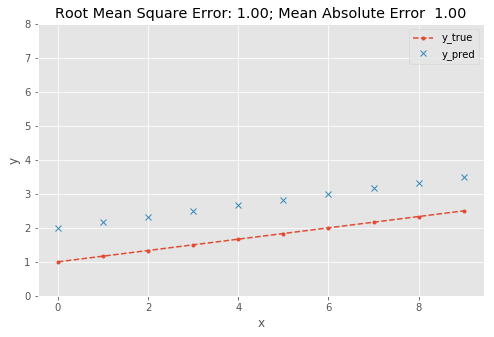

In [116]:
n = 10
x = np.linspace(0, 1, n)
y_true = 1 + 1.5 * x
y_pred = y_true + 1
plot_compare_mae_rmsle(y_true, y_pred)

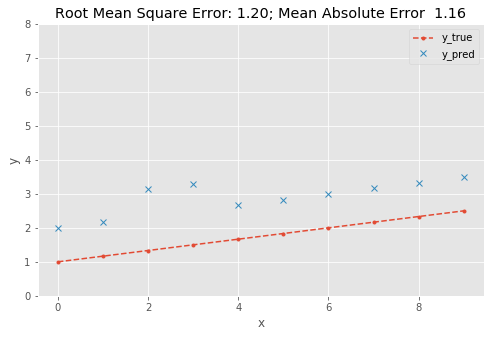

In [117]:
y_pred = y_true + 1
y_pred[2:4] = y_true[2:4] + 1.8
plot_compare_mae_rmsle(y_true, y_pred)

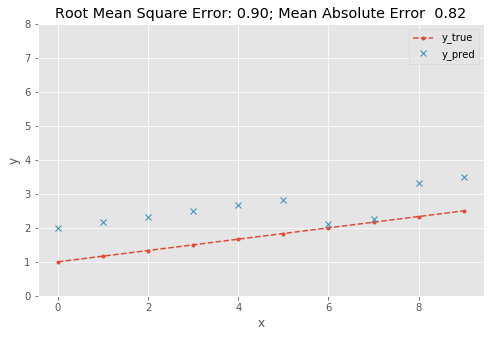

In [118]:
y_pred = y_true + 1
y_pred[6:8] = y_true[6:8] + 00.1
plot_compare_mae_rmsle(y_true, y_pred)

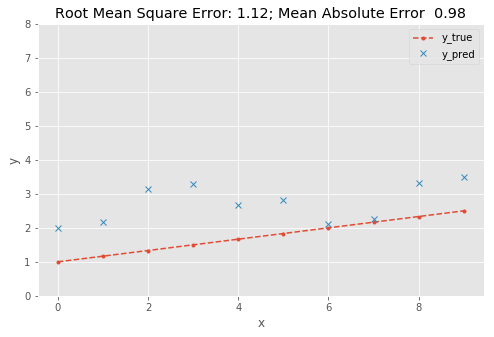

In [119]:
y_pred = y_true + 1
y_pred[2:4] = y_true[2:4] + 1.8
y_pred[6:8] = y_true[6:8] + 00.1
plot_compare_mae_rmsle(y_true, y_pred)

#### rmsq v.s. rmsle

In [120]:
def root_mean_squared_error(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))


def root_mean_squared_log_error(y_true, y_pred):
    return np.sqrt(mean_squared_log_error(y_true, y_pred))


def plot_yy(y_true, y_pred):
    x = range(len(y_true))
    plt.figure(figsize=(8, 5))
    plt.plot(x, y_true, '.--', label='y_true')
    plt.plot(x, y_pred, 'x', label='y_pred')
    plt.legend(loc='best')
    plt.xlabel('x')
    plt.ylabel('y')


def plot_compare_rmse_rmsle(y_true, y_pred):
    plot_yy(y_true, y_pred)
    plt.ylim(0, 3800)
    plt.title('Root Mean Square Error: %.2f; Root Mean Squared Logarithmic Error  %.2f' %
              (root_mean_squared_error(y_true, y_pred),
               root_mean_squared_log_error(y_true, y_pred)))

In [121]:
n = 10
x = np.linspace(0, 10, n)
y_true = 100 + 100 * x
y_pred = y_true + 100

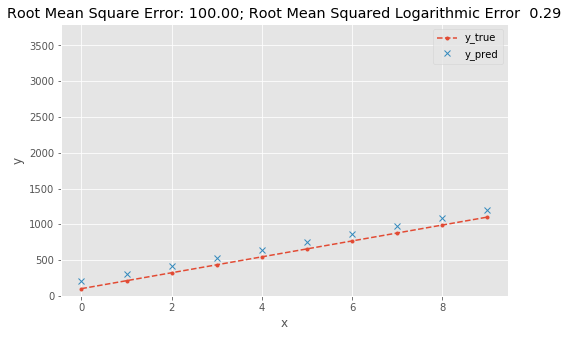

In [122]:
plot_compare_rmse_rmsle(y_true, y_pred)

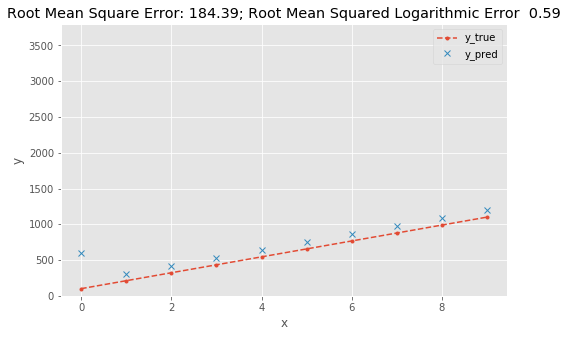

In [123]:
y_pred = y_true + 100
i = 0
y_pred[i] = 3 * y_pred[i]
plot_compare_rmse_rmsle(y_true, y_pred)

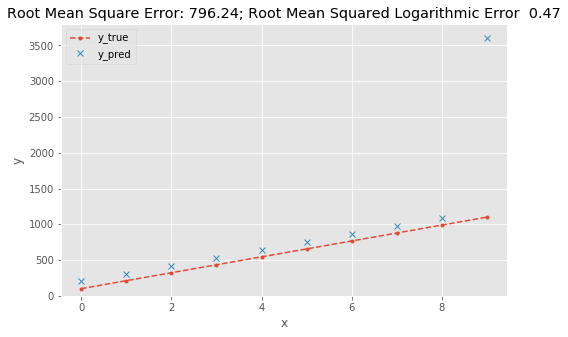

In [124]:
y_pred = y_true + 100
i = 9
y_pred[i] = 3 * y_pred[i]
plot_compare_rmse_rmsle(y_true, y_pred)

### R2

In [143]:
from sklearn.metrics import r2_score
def root_mean_squared_error(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))


def plot_yy_r2(y_true, y_pred):
    x = range(len(y_true))
    plt.figure(figsize=(8, 5))
    plt.plot(x, y_true, '.--', label='y_true')
    plt.plot(x, y_pred, 'x', label='y_pred')
    plt.legend(loc='best')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.ylim(0, 18)
    plt.title('R2: %.2f; Root Mean Square Error: %.2f' %
              (r2_score(y_true, y_pred),
               root_mean_squared_error(y_true, y_pred)))

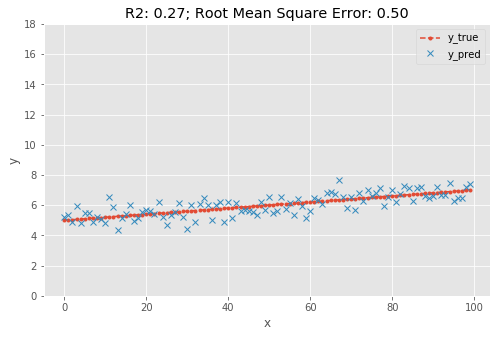

In [148]:
n = 100
x = np.linspace(0, 1, n)
y_true = 5 + 2 * x
error = 0.5*np.random.normal(size=n)
y_pred = y_true + error

plot_yy_r2(y_true, y_pred)

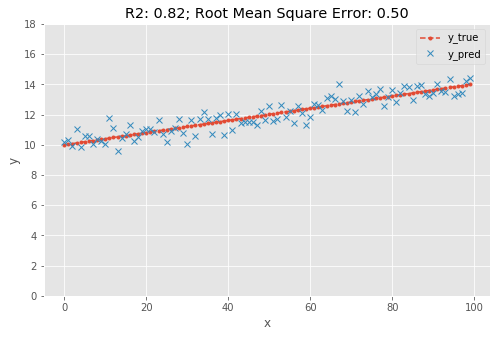

In [149]:
y_true = 2 * y_true
y_pred = y_true + error

plot_yy_r2(y_true, y_pred)

### log loss formula

In [281]:
def log_loss_binary_scalar(y_true, y_pred, eps=1e-15):
    if y_pred < eps:
        y_pred = eps
    elif y_pred > 1 - eps:
        y_pred = 1 - eps
    if y_true == 1:
        return -np.log(y_pred)
    else:
        return -np.log(1 - y_pred)

In [284]:
def log_loss_multiple_scalar(y_true, y_pred, eps=1e-15):
    p = y_pred[y_true]
    if p < eps:
        p = eps
    elif p > 1 - eps:
        p = 1 - eps
    return -np.log(p)

### log_loss information theory

In [4]:
from sklearn.metrics import log_loss
from scipy.stats import entropy

p = np.array([0, 1])
q = np.array([0.1, 0.9])
y_true, y_pred = [p[1]], [q[1]]
entropy_p = entropy(p)
kl_divergence_pq = entropy(p, q)
logloss = log_loss(y_true, y_pred, labels=(0, 1))

print('entropy(p): %.4f; kl_divergence_pq(p, q): %.4f; log_loss: %.4f' %
      (entropy_p, kl_divergence_pq, logloss))

entropy(p): 0.0000; kl_divergence_pq(p, q): 0.1054; log_loss: 0.1054


### log_loss v.s. kl divergence

In [5]:
def cross_entropy(p, q):
    ce = .0
    for pi, qi in zip(p, q):
        if qi > 0:
            ce += -(pi * np.log(qi))
    return ce

# def entropy(p):
#     p = np.array(p)
#     sum_ = .0
#     for pi in p:
#         if pi > 0:
#             sum_ += -pi * np.log(pi) 
#     return sum_

# def kl_divergence(p, q):
#     p, q = np.array(p), np.array(q)
#     sum_ = 0
#     for i, pi in enumerate(p):
#         if pi != 0 and q[i] > 0:
#             sum_ += pi * np.log(pi/q[i])
#     return sum_

In [6]:
import numpy as np
ces = {'p':[], 
       'q': [], 
       'cross_entropy(p, q)': [], 
       'entropy(p)': [], 
       'kl_divergence(p, q)': [],
       'log_loss(p, q)': []}
p0s = np.linspace(0, 1, num=11)
ps = [(round(p0, 2), round(1-p0, 2)) for p0 in p0s]
q = (0.9, 0.1)
for p in ps:
    ces['p'].append(p)
    ces['q'].append(q)
    ces['cross_entropy(p, q)'].append(cross_entropy(p, q))
    ces['entropy(p)'].append(entropy(p))
    ces['kl_divergence(p, q)'].append(entropy(p, q))
    try:
        ces['log_loss(p, q)'].append(log_loss(p, q))
    except ValueError:
        ces['log_loss(p, q)'].append(None)

In [7]:
import pandas as pd
df = pd.DataFrame(ces).round(3)[[
    'p',
    'q',
    'entropy(p)',
    'cross_entropy(p, q)',
    'kl_divergence(p, q)',
    'log_loss(p, q)',
]]
df

,p,q,entropy(p),"cross_entropy(p, q)","kl_divergence(p, q)","log_loss(p, q)"
0,"(0.0, 1.0)","(0.9, 0.1)",0.000,2.303,2.303,2.303
1,"(0.1, 0.9)","(0.9, 0.1)",0.325,2.083,1.758,NaN
2,"(0.2, 0.8)","(0.9, 0.1)",0.500,1.863,1.363,NaN
3,"(0.3, 0.7)","(0.9, 0.1)",0.611,1.643,1.033,NaN
4,"(0.4, 0.6)","(0.9, 0.1)",0.673,1.424,0.751,NaN
5,"(0.5, 0.5)","(0.9, 0.1)",0.693,1.204,0.511,NaN
6,"(0.6, 0.4)","(0.9, 0.1)",0.673,0.984,0.311,NaN
7,"(0.7, 0.3)","(0.9, 0.1)",0.611,0.765,0.154,NaN
8,"(0.8, 0.2)","(0.9, 0.1)",0.500,0.545,0.044,NaN
9,"(0.9, 0.1)","(0.9, 0.1)",0.325,0.325,0.000,NaN


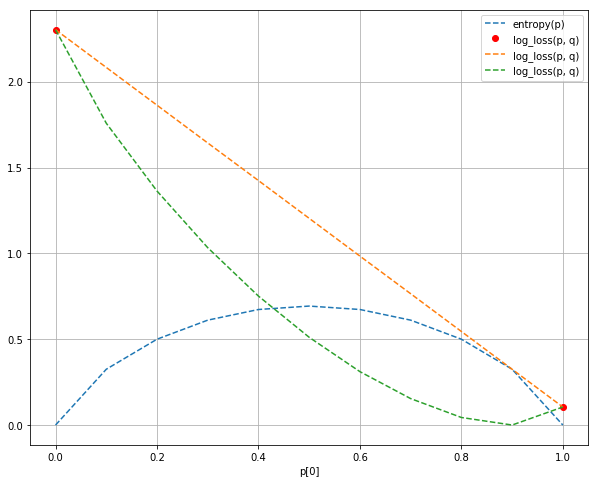

In [8]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8))
plt.plot(p0s, df['entropy(p)'], '--', label='entropy(p)')
plt.plot(p0s, df['log_loss(p, q)'], 'or', label='log_loss(p, q)')
plt.plot(p0s, df['cross_entropy(p, q)'], '--', label='log_loss(p, q)')
plt.plot(p0s, df['kl_divergence(p, q)'], '--', label='log_loss(p, q)')
plt.legend()
plt.xlabel('p[0]')
plt.grid()

### logloss only cares about correct labels

In [203]:
labels = [0, 1, 1]
preds = [[.9, .1], 
          [.1, .9], 
          [.1, .9]]
print(log_loss(labels, preds))
pd.DataFrame({'labels': labels, 'preds': preds})

0.10536051565782628


,labels,preds
0,0,"[0.9, 0.1]"
1,1,"[0.1, 0.9]"
2,1,"[0.1, 0.9]"


In [59]:
from sklearn.metrics import log_loss

labels = [0, 1, 2]
preds = [[.9, .1, .0], 
          [.0, .9, .1], 
          [.1, .0, .9]]
print(log_loss(labels, preds))
pd.DataFrame({'labels': labels, 'preds': preds})

0.10536051565782739


,labels,preds
0,0,"[0.9, 0.1, 0.0]"
1,1,"[0.0, 0.9, 0.1]"
2,2,"[0.1, 0.0, 0.9]"


In [204]:
labels = [0, 1, 2]
preds = [[.9, .05, .05], 
          [.05, .9, .05], 
          [.05, .05, .9]]
print(log_loss(labels, preds))
pd.DataFrame({'labels': labels, 'preds': preds})

0.10536051565782628


,labels,preds
0,0,"[0.9, 0.05, 0.05]"
1,1,"[0.05, 0.9, 0.05]"
2,2,"[0.05, 0.05, 0.9]"


### log_loss cutting point

In [91]:
y_true = [0, 1]
y_pred = [1, 0]
recs.append((y_true, y_pred, log_loss(y_true, y_pred)))
log_loss(y_true, y_pred)

34.53917619362578

In [92]:
y_true = [1, 0]
y_pred = [0.01, 0.99]
recs.append((y_true, y_pred, log_loss(y_true, y_pred)))
log_loss(y_true, y_pred)

4.605170185988091

In [103]:
recs = []

In [104]:
y_true = [1, 1]
y_pred = [0, 1]
recs.append((y_true, y_pred, log_loss(y_true, y_pred, labels=[0, 1])))
log_loss(y_true, y_pred, labels=[0, 1])

17.269388197455342

In [105]:
y_true = [1, 1]
y_pred = [0.01, 0.99]
recs.append((y_true, y_pred, log_loss(y_true, y_pred, labels=[0, 1])))
log_loss(y_true, y_pred, labels=[0, 1])

2.307610260920796

In [106]:
y_true = [1, 1]
y_pred = [0.1, 0.9]
recs.append((y_true, y_pred, log_loss(y_true, y_pred, labels=[0, 1])))
log_loss(y_true, y_pred, labels=[0, 1])

1.203972804325936

In [107]:
df = pd.DataFrame(recs)
df.columns = ['y_true', 'y_pred', 'log loss']
df

,y_true,y_pred,log loss
0,"[1, 1]","[0, 1]",17.269388
1,"[1, 1]","[0.01, 0.99]",2.307610
2,"[1, 1]","[0.1, 0.9]",1.203973


In [108]:
recs = []

In [109]:
y_true = [1, 1, 1, 0]
y_pred = [1, 1, 1, 1]
recs.append((y_true, y_pred, log_loss(y_true, y_pred)))
log_loss(y_true, y_pred)

8.63489399808522

In [110]:
y_true = [1, 1, 1, 0]
y_pred = [0.99, 0.99, 0.99, 0.99]
recs.append((y_true, y_pred, log_loss(y_true, y_pred)))
log_loss(y_true, y_pred)

1.1588302983871488

In [111]:
y_true = [1, 1, 1, 0]
y_pred = [0.95, 0.95, 0.95, 0.95]
recs.append((y_true, y_pred, log_loss(y_true, y_pred)))
log_loss(y_true, y_pred)

0.7874030391791604

In [112]:
df = pd.DataFrame(recs)
df.columns = ['y_true', 'y_pred', 'log loss']
df

,y_true,y_pred,log loss
0,"[1, 1, 1, 0]","[1, 1, 1, 1]",8.634894
1,"[1, 1, 1, 0]","[0.99, 0.99, 0.99, 0.99]",1.158830
2,"[1, 1, 1, 0]","[0.95, 0.95, 0.95, 0.95]",0.787403


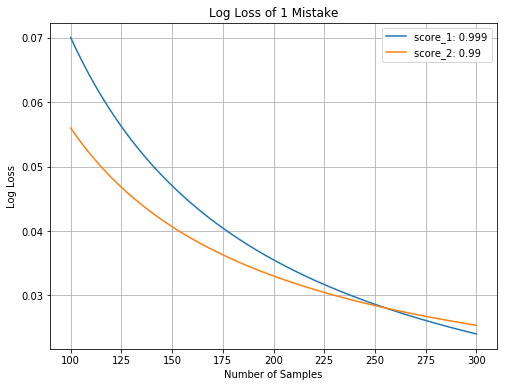

In [89]:
ll_1, ll_2 = [], []
ns = range(100, 301)
s1 = 0.999
s2 = 0.99
for n in ns:
    y_true = np.ones(n)
    y_true[-1] = 0
    y_pred_1 = s1 * np.ones(n)
    y_pred_2 = s2 * np.ones(n)
    ll_1.append(log_loss(y_true, y_pred_1))
    ll_2.append(log_loss(y_true, y_pred_2))

plt.figure(figsize=(8, 6))
plt.plot(ns, ll_1, label='score_1: %s' % s1)
plt.plot(ns, ll_2, label='score_2: %s' % s2)
plt.legend(loc='best')
plt.ylabel('Log Loss')
plt.xlabel('Number of Samples')
plt.title('Log Loss of 1 Mistake')
plt.grid()
plt.show()

### roc_auc

In [291]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import average_precision_score
y_true = [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
y_score = [0.232, 0.193, 0.171, 0.123, 0.116, 0.107, 0.100, 0.091, 0.077,
       0.07 , 0.07 , 0.06 , 0.06 , 0.05 , 0.05 , 0.05 , 0.05 , 0.05 ,
       0.04 , 0.04 , 0.04 , 0.04 , 0.04 , 0.03 , 0.03 , 0.03 , 0.03 ,
       0.03 , 0.03 , 0.03 , 0.03 , 0.03 , 0.03 , 0.03 , 0.03 , 0.03 ,
       0.03 , 0.03 , 0.03 , 0.03 , 0.03 , 0.03 , 0.02 , 0.02 , 0.02 ,
       0.02 , 0.02 , 0.02 , 0.02 , 0.02 , 0.02 , 0.02 , 0.02 , 0.02 ,
       0.02 , 0.02 , 0.02 , 0.02 , 0.02 , 0.02 , 0.02 , 0.02 , 0.02 ,
       0.02 , 0.02 , 0.02 , 0.02 , 0.02 , 0.02 , 0.02 , 0.02 , 0.02 ,
       0.02 , 0.02 , 0.02 , 0.02 , 0.02 , 0.02 , 0.02 , 0.02 , 0.02 ,
       0.02 , 0.02 , 0.02 , 0.02 , 0.02 , 0.02 , 0.02 , 0.02 , 0.02 ,
       0.02 , 0.02 , 0.02 , 0.02 , 0.02 , 0.02 , 0.02 , 0.02 , 0.02 ,
       0.02 , 0.02 , 0.02 , 0.02 , 0.02 , 0.02 , 0.02 , 0.02 , 0.02 ,
       0.02 , 0.02 , 0.02 , 0.02 , 0.02 , 0.02 , 0.02 , 0.02 , 0.02 ,
       0.02 , 0.02 , 0.02 , 0.02 , 0.02 , 0.02 , 0.02 , 0.02 , 0.02 ,
       0.02 , 0.02 , 0.02 , 0.02 , 0.02 , 0.01 , 0.01 , 0.01 , 0.01 ,
       0.01 , 0.01 , 0.01 , 0.01 , 0.01 , 0.01 , 0.01 , 0.01 , 0.01 ,
       0.01 , 0.01 , 0.01 , 0.01 , 0.01 , 0.01 , 0.01 , 0.01 , 0.01 ,
       0.01 , 0.01 , 0.01 , 0.01 , 0.01 , 0.01 , 0.01 , 0.01 , 0.01 ,
       0.01 , 0.01 , 0.01 , 0.01 , 0.01 , 0.01 , 0.01 , 0.01 , 0.01 ,
       0.01 , 0.01 , 0.01 , 0.01 , 0.01 , 0.01 , 0.01 , 0.01 , 0.01 ,
       0.01 , 0.01 , 0.01 , 0.01 , 0.01 , 0.01 , 0.01 , 0.01 , 0.01 ,
       0.01 , 0.01 , 0.01 , 0.01 , 0.01 , 0.01 , 0.01 , 0.01 , 0.01 ,
       0.01 , 0.01 , 0.01 , 0.01 , 0.01 , 0.01 , 0.01 , 0.01 , 0.01 ,
       0.01 , 0.01 , 0.01 , 0.01 , 0.01 , 0.01 , 0.01 , 0.01 , 0.01 ,
       0.01 , 0.01 , 0.01 , 0.01 ]

In [297]:
24//5

4

In [299]:
list(range(len(y_true)//5, len(y_true), len(y_true)//5))

[44, 88, 132, 176]

In [327]:
df = pd.DataFrame({'y_true': y_true, 'y_score': y_score})
df = df[['y_true', 'y_score']]

,y_true,y_score
0,0,0.232
1,0,0.193
2,0,0.171
3,0,0.123
4,0,0.116
5,1,0.107
6,0,0.100
7,0,0.091
8,0,0.077
9,0,0.070


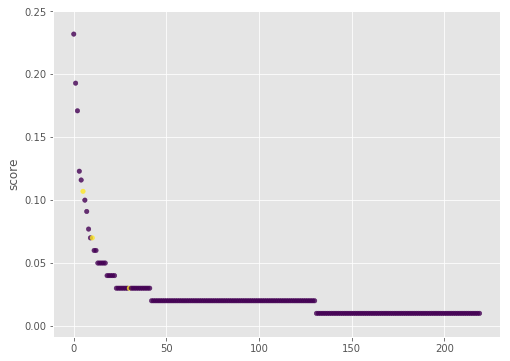

In [357]:
plt.figure(figsize=(8, 6))
plt.scatter(range(len(y_score)), y_score, c=y_true, s=20, alpha=.8)
plt.ylabel('score')
plt.show()

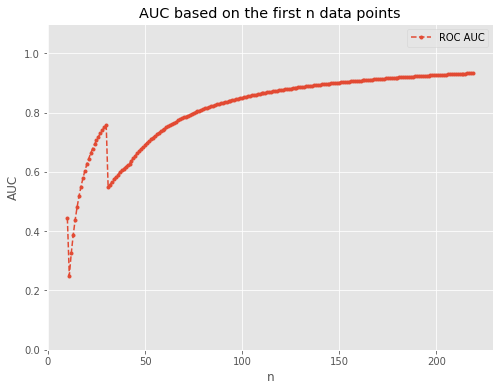

In [370]:
roc_aucs = []
rs = range(10, len(df))
for i in rs:
    roc_aucs.append(roc_auc_score(y_true[:i], y_score[:i]))

plt.figure(figsize=(8, 6))
plt.plot(rs, roc_aucs, '.--', label='ROC AUC')
plt.xlabel('n')
plt.ylabel('AUC')
plt.title('AUC based on the first n data points')
plt.ylim(0, 1.1)
plt.legend()
plt.show()

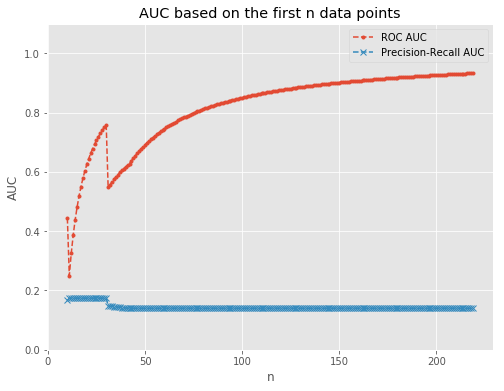

In [369]:
from sklearn.metrics import average_precision_score
roc_aucs = []
pr_aucs = []

rs = range(10, len(df))
for i in rs:
    roc_aucs.append(roc_auc_score(y_true[:i], y_score[:i]))
    pr_aucs.append(average_precision_score(y_true[:i], y_score[:i]))

plt.figure(figsize=(8, 6))
plt.plot(rs, roc_aucs, '.--', label='ROC AUC')
plt.plot(rs, pr_aucs, 'x--', label='Precision-Recall AUC')
plt.xlabel('n')
plt.ylabel('AUC')
plt.title('AUC based on the first n data points')
plt.ylim(0, 1.1)
plt.legend()
plt.show()

### example bulldozer

In [79]:
df = pd.read_csv('bulldozer/Train.csv')

/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (13,39,40,41) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


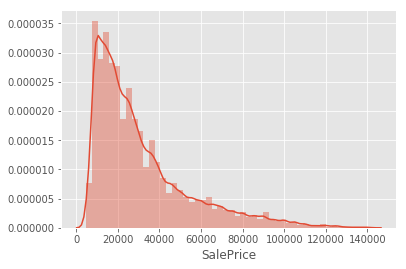

In [80]:
import seaborn as sns
ax = plt.axes()
sns.distplot(df.SalePrice, ax = ax)

### 123 example

In [67]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

y_true = np.random.choice([1, 2, 3], 50)
y_pred = np.random.choice([1, 2, 3], 50)
def root_mean_squared_error(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))
mean_squared_error(y_true, y_pred), mean_absolute_error(y_true, y_pred)

(1.12, 0.84)

In [72]:
y_true, y_pred = [1, 2, 3], [3, 1, 1]
root_mean_squared_error(y_true, y_pred), mean_absolute_error(y_true, y_pred)

(1.7320508075688772, 1.6666666666666667)

### restaurant
https://www.kaggle.com/c/restaurant-revenue-prediction/data

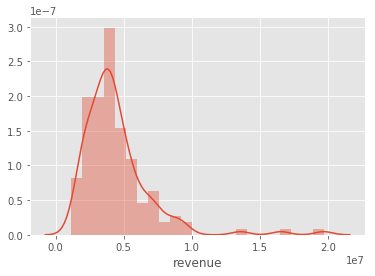

In [82]:
df = pd.read_csv('restaurant/train.csv')

import seaborn as sns
ax = plt.axes()
sns.distplot(df.revenue, ax = ax)

### MAP 

In [14]:
import numpy as np

def apk(actuals, preds, k):
    actuals = set(actuals)
    if len(preds) > k:
        preds = preds[:k]
    total_score = 0
    hits = 0
    for i, pred in enumerate(preds):
        if pred in actuals and preds not in preds[:i]:
            hits += 1
            total_score += hits / (i + 1)
    if len(actuals) == 0:
        return 0
    
    return total_score / min(k, len(actuals))

def ap(actuals, preds, debug=False):
    actuals = set(actuals)
    num_actuals = len(actuals)
    recall_at_k = 0
    precision_at_k = 0
    hits = 0
    precisions = []
    for i, pred in enumerate(preds):
        k = i + 1
        if pred in actuals and pred not in preds[:i]:
            hit = True
            hits += 1
        else:
            hit = False
        
        recall_at_k = hits / num_actuals
        precision_at_k = hits / k
        
        if hit:
            precisions.append(precision_at_k)
        
        if debug: print('R@K: %.2f P@K: %.2f - %s' % (recall_at_k, precision_at_k, hit) )
        
        if recall_at_k == 1:
            break
            
    if recall_at_k != 1:
        raise ValueError("Recall did not reach 1 after all predictions have been checked!")
    
    return np.mean(precisions)

https://ils.unc.edu/courses/2013_spring/inls509_001/lectures/10-EvaluationMetrics.pdf

#### ap v.s. apk

In [33]:
actuals = list(range(10))
preds = [0, 100, 1, 2, 3, 4, 5, 101, 6, 102, 7, 103, 104, 8, 105, 106, 107, 9, 108, 109]

In [34]:
actuals

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [35]:
def apk_rec(actuals, preds, k_max):
    rec_hit = []
    rec_prec = []
    rec_apk = []
    actuals = set(actuals)
    if len(preds) > k_max:
        preds = preds[:k_max]
    total_score = 0
    hits = 0
    for i, pred in enumerate(preds):
        if pred in actuals and preds not in preds[:i]:
            hits += 1
            total_score += hits / (i + 1)
            rec_hit.append(1)
            rec_prec.append(hits / (i + 1))
        else:
            rec_hit.append(0)
            rec_prec.append(0)
        rec_apk.append(total_score/min(i+1, len(actuals)))
    if len(actuals) == 0:
        return 0
    
    return rec_hit, rec_prec, rec_apk#total_score / min(k, len(actuals))

In [36]:
k_max = 25
rec_hit, rec_prec, rec_apk = apk_rec(actuals, preds, k_max)

In [37]:
rec_apk

[1.0,
 0.5,
 0.5555555555555555,
 0.6041666666666666,
 0.6433333333333333,
 0.6749999999999999,
 0.7010204081632653,
 0.6133928571428571,
 0.6316578483245149,
 0.5684920634920634,
 0.6412193362193361,
 0.6412193362193361,
 0.6412193362193361,
 0.7055050505050505,
 0.7055050505050505,
 0.7055050505050505,
 0.7055050505050505,
 0.761060606060606,
 0.761060606060606,
 0.761060606060606]

In [38]:
rec_apk_verify = []
for k in range(1, k_max+1):
    rec_apk_verify.append(apk(actuals, preds, k))

In [39]:
list(zip(rec_apk, rec_apk_verify))

[(1.0, 1.0),
 (0.5, 0.5),
 (0.5555555555555555, 0.5555555555555555),
 (0.6041666666666666, 0.6041666666666666),
 (0.6433333333333333, 0.6433333333333333),
 (0.6749999999999999, 0.6749999999999999),
 (0.7010204081632653, 0.7010204081632653),
 (0.6133928571428571, 0.6133928571428571),
 (0.6316578483245149, 0.6316578483245149),
 (0.5684920634920634, 0.5684920634920634),
 (0.6412193362193361, 0.6412193362193361),
 (0.6412193362193361, 0.6412193362193361),
 (0.6412193362193361, 0.6412193362193361),
 (0.7055050505050505, 0.7055050505050505),
 (0.7055050505050505, 0.7055050505050505),
 (0.7055050505050505, 0.7055050505050505),
 (0.7055050505050505, 0.7055050505050505),
 (0.761060606060606, 0.761060606060606),
 (0.761060606060606, 0.761060606060606),
 (0.761060606060606, 0.761060606060606)]

In [51]:
def ap_rec(actuals, preds):
    actuals = set(actuals)
    num_actuals = len(actuals)
    recall_at_k = 0
    precision_at_k = 0
    hits = 0
    precisions = []
    rec_recalls = []
    rec_precisions = []
    for i, pred in enumerate(preds):
        k = i + 1
        if pred in actuals and pred not in preds[:i]:
            hit = True
            hits += 1
        else:
            hit = False
        
        recall_at_k = hits / num_actuals
        precision_at_k = hits / k
        
        if hit:
            precisions.append(precision_at_k)
            rec_precisions.append(precision_at_k)
        else:
            rec_precisions.append(0)
        rec_recalls.append(recall_at_k)
            
    return rec_precisions, rec_recalls

In [52]:
ap(actuals, preds)

0.7610606060606061

In [53]:
rec_precisions, rec_recalls = ap_rec(actuals, preds)

In [54]:
np.mean([i for i in rec_precisions if i > 0])

0.7610606060606061

In [55]:
import pandas as pd
df = pd.DataFrame({
    'k': range(1,
               len(preds) + 1),
    'preds': preds[:k],
    'hit': rec_hit,
    'precision_at_k': rec_prec,
    'average_precision_at_k': rec_apk,
    'rec_precisions': rec_precisions,
    'recall_at_k': rec_recalls,
}).round(3)
df

,average_precision_at_k,hit,k,precision_at_k,preds,rec_precisions,recall_at_k
0,1.000,1,1,1.000,0,1.000,0.1
1,0.500,0,2,0.000,100,0.000,0.1
2,0.556,1,3,0.667,1,0.667,0.2
3,0.604,1,4,0.750,2,0.750,0.3
4,0.643,1,5,0.800,3,0.800,0.4
5,0.675,1,6,0.833,4,0.833,0.5
6,0.701,1,7,0.857,5,0.857,0.6
7,0.613,0,8,0.000,101,0.000,0.6
8,0.632,1,9,0.778,6,0.778,0.7
9,0.568,0,10,0.000,102,0.000,0.7


In [56]:
df[['k', 'preds', 'hit', 'precision_at_k', 'recall_at_k', 'average_precision_at_k']]

,k,preds,hit,precision_at_k,recall_at_k,average_precision_at_k
0,1,0,1,1.000,0.1,1.000
1,2,100,0,0.000,0.1,0.500
2,3,1,1,0.667,0.2,0.556
3,4,2,1,0.750,0.3,0.604
4,5,3,1,0.800,0.4,0.643
5,6,4,1,0.833,0.5,0.675
6,7,5,1,0.857,0.6,0.701
7,8,101,0,0.000,0.6,0.613
8,9,6,1,0.778,0.7,0.632
9,10,102,0,0.000,0.7,0.568


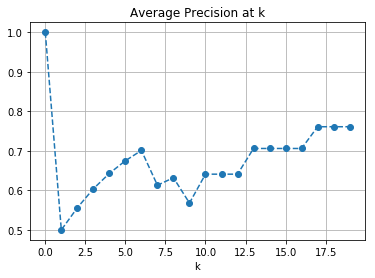

In [57]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(df['average_precision_at_k'], 'o--')
plt.title('Average Precision at k')
plt.xlabel('k')
plt.grid()

In [58]:
ap(actuals, preds)

0.7610606060606061